# PCA Brief
## Codes for Viz
Note: This is just a rough code which includes the graphs used in the PCA brief as well as additional visualizations that did not make it to the final explainer.

In [290]:
import pandas as pd
import matplotlib.pyplot as plt

In [291]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [292]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url,
                 names=['sepal length','sepal width','petal length','petal width','target'])

In [293]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [294]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [295]:
df.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

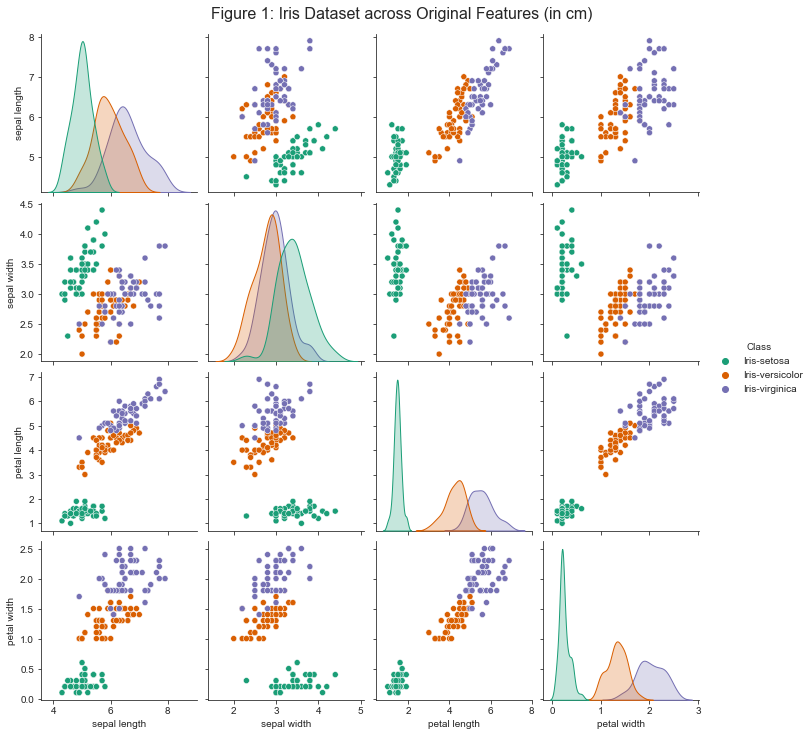

In [296]:
import seaborn as sns
sns.set_style('ticks')

# Defining colors for each cluster
color_dict = {'Iris-setosa':'#1b9e77',
              'Iris-versicolor':'#d95f02',
              'Iris-virginica':'#7570b3'}

# Paired plot using seaborn
ax = sns.pairplot(df,
                  palette = color_dict,
             hue="target", diag_kind="kde")
ax.fig.suptitle('Figure 1: Iris Dataset across Original Features (in cm)',
               y=1.02,fontsize=16);
ax._legend.set_title('Class');

# Source: https://archive.ics.uci.edu/ml/datasets/iris

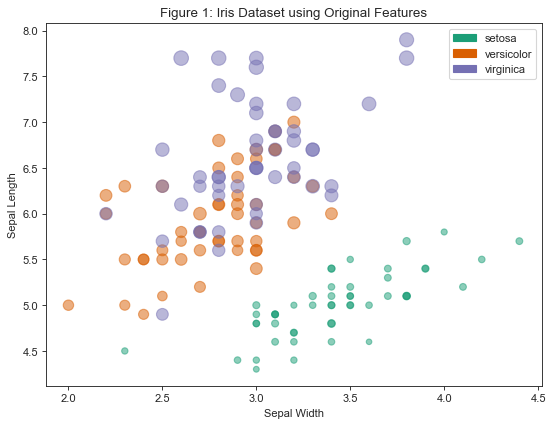

In [297]:
# Scatterplot

# Assigning colors to each cluster
df['cluster_color'] = [color_dict[x] for x in df['target']]

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(8,6), dpi=80)



plt.scatter(
    x=df['sepal width'],
    y=df['sepal length'],
    alpha=0.5,
    s=df['petal length']*25,
    c=df['cluster_color'])
plt.title('Figure 1: Iris Dataset using Original Features')
plt.ylabel('Sepal Length')
plt.xlabel('Sepal Width')

import matplotlib.patches as mpatches
label_setosa = mpatches.Patch(color='#1b9e77', label='setosa')
label_versicolora = mpatches.Patch(color='#d95f02', label='versicolor')
label_virginica = mpatches.Patch(color='#7570b3', label='virginica')

plt.legend(handles=[label_setosa,
                   label_versicolora,
                   label_virginica]);

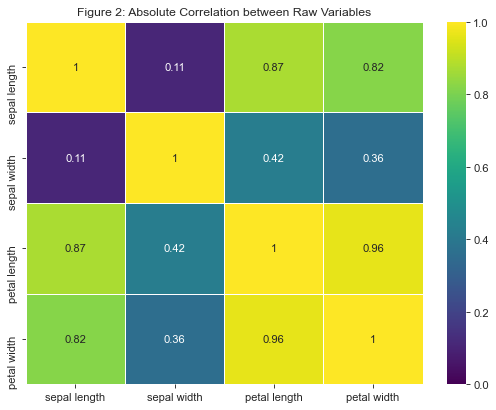

In [298]:
plt.figure(figsize=(8,6),dpi=80)
plt.title("Figure 2: Absolute Correlation between Raw Variables",
         fontsize=11)
sns.heatmap(abs(df.corr()),vmin=0,vmax=1,linewidths=.5,annot=True,square=False,
           cmap='viridis')
plt.show()

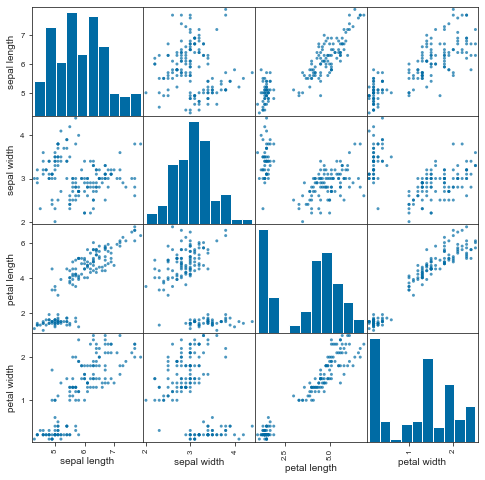

In [299]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.7, figsize=[8,8]);

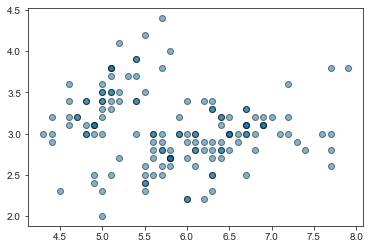

In [301]:
plt.scatter(x=df['sepal length'],
y=df['sepal width'],
alpha=0.5,
#s=df['petal length']*200,
#c=df['sepal width'],
cmap='viridis',
edgecolor='k')

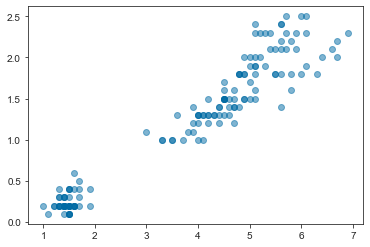

In [302]:
plt.scatter(x=df['petal length'],
y=df['petal width'],
alpha=0.5)

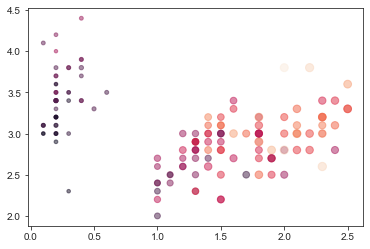

In [303]:
plt.scatter(x=df['petal width'],
y=df['sepal width'],            
s=df['petal length']*10,
c=df['sepal length'],
alpha=0.5)

In [304]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Standardize the Data

In [305]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler

In [306]:
scaler = StandardScaler()
X_std = pd.DataFrame(data = scaler.fit_transform(X),
                     columns = iris.feature_names)

In [307]:
# Importing PCA
from sklearn.decomposition import PCA
  
# instantiate
pca = PCA(n_components = 4, random_state=123)
mod = pca.fit(X_std)
X_pca = pca.fit_transform(X_std)

## fit: Our principal components analysis model has now been created, whch means that we now have a model that explains some of the variance of our original data set with just 2 variables.

In [308]:
## Get % of variance explained by each component
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3","PC4"]).T

,PC1,PC2,PC3,PC4
0,73.0,23.0,4.0,1.0


In [309]:
import numpy as np

In [310]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target',
       'cluster_color'],
      dtype='object')

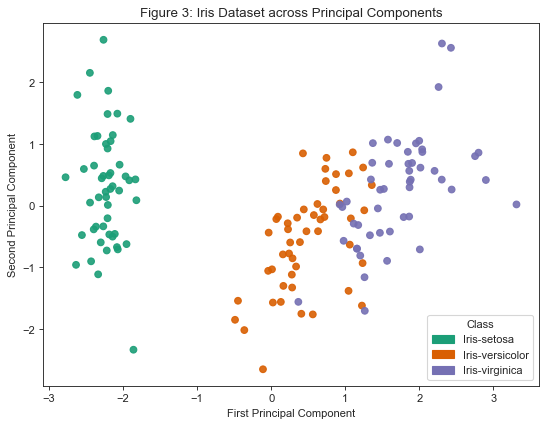

In [311]:
plt.figure(figsize=(8,6),dpi=80)

plt.scatter(
    x=pd.DataFrame(X_pca)[0],
    y=pd.DataFrame(X_pca)[1],
    alpha=.9,
    c=df['cluster_color'])

plt.title('Figure 3: Iris Dataset across Principal Components')
plt.ylabel('Second Principal Component')
plt.xlabel('First Principal Component')

import matplotlib.patches as mpatches
label_setosa = mpatches.Patch(color='#1b9e77', label='Iris-setosa')
label_versicolora = mpatches.Patch(color='#d95f02', label='Iris-versicolor')
label_virginica = mpatches.Patch(color='#7570b3', label='Iris-virginica')

plt.legend(title='Class',
           handles=[label_setosa,
                   label_versicolora,
                   label_virginica])
plt.style.use('fast');



In [314]:
## Build df with number of components and explained variance
pc_df = pd.DataFrame(mod.explained_variance_ratio_,
                             index=np.arange(pca.n_components_) + 1,
                             columns=["perc_var"])

In [315]:
## Reset index, rename components
pc_df = pc_df.reset_index()

In [316]:
# rename column
pc_df = pc_df.rename(columns={"index":"components"})

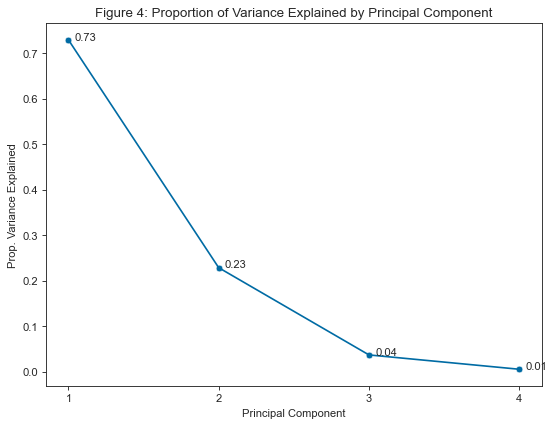

In [317]:
# graph proportion of variance explained by PC
plt.figure(figsize=(8,6),dpi=80)
ax = sns.lineplot(x = "components",
            y = "perc_var",
            data=pc_df)
sns.scatterplot(x = "components",
            y = "perc_var",
            data=pc_df)
plt.title("Figure 4: Proportion of Variance Explained by Principal Component")
plt.ylabel("Prop. Variance Explained")
plt.xlabel("Principal Component")
# plt.axhline(0.1,linewidth=1,linestyle="--",color='r')
# plt.axhline(0.075,linewidth=1,linestyle="--",color='r')
# plt.axhline(0.05,linewidth=1,linestyle="--",color='r')
ax.set_xticks([1,2,3,4])

# add annotations one by one with a loop
for line in range(0,pc_df.shape[0]):
     plt.text(pc_df.components[line]+0.04, pc_df.perc_var[line], round(pc_df.perc_var[line],2), 
              horizontalalignment='left', size=10)

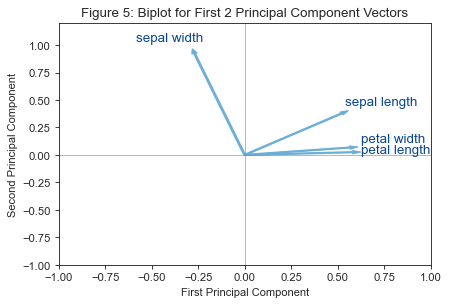

In [313]:
plt.figure(dpi=80)

plt.xlim(-1,1)
plt.ylim(-1,1.2)

plt.axhline(0,linewidth=.5,color='gray')
plt.axvline(0,linewidth=.5, color='gray')

# plt.axhline(-0.3,linewidth=.5,color='#dfc27d')
# plt.axhline(0.3,linewidth=.5,color='#dfc27d')
# plt.axvline(-0.3,linewidth=.5,color='#dfc27d')
# plt.axvline(0.3,linewidth=.5,color='#fdae61')
    
coeff = np.transpose(pca.components_[0:2,:])
n = coeff.shape[0]
for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = '#6baed6',shape='full',width=.01)
    if df.columns[i] == 'petal length':
        plt.text(coeff[i,0]* 1.5-.06, coeff[i,1] * 1.15+.02, df.columns[i], color = '#084594', ha = 'center', va = 'center',
                fontsize=12)
    elif df.columns[i] == 'petal width':
        plt.text(coeff[i,0]* 1.5-.05, coeff[i,1] * 1.15+.07, df.columns[i], color = '#084594', ha = 'center', va = 'center',
                fontsize=12)
    elif df.columns[i] == 'sepal width':
        plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.15, df.columns[i], color = '#084594', ha = 'center', va = 'center',
                fontsize=12)
    elif df.columns[i] == 'sepal length':
        plt.text(coeff[i,0]* 1.5-.05, coeff[i,1] * 1.15+.05, df.columns[i], color = '#084594', ha = 'center', va = 'center',
                fontsize=12)
        
plt.title("Figure 5: Biplot for First 2 Principal Component Vectors", fontsize=12)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component");